In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

In [2]:
# Load the daily minimum temperatures dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows
print(data.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


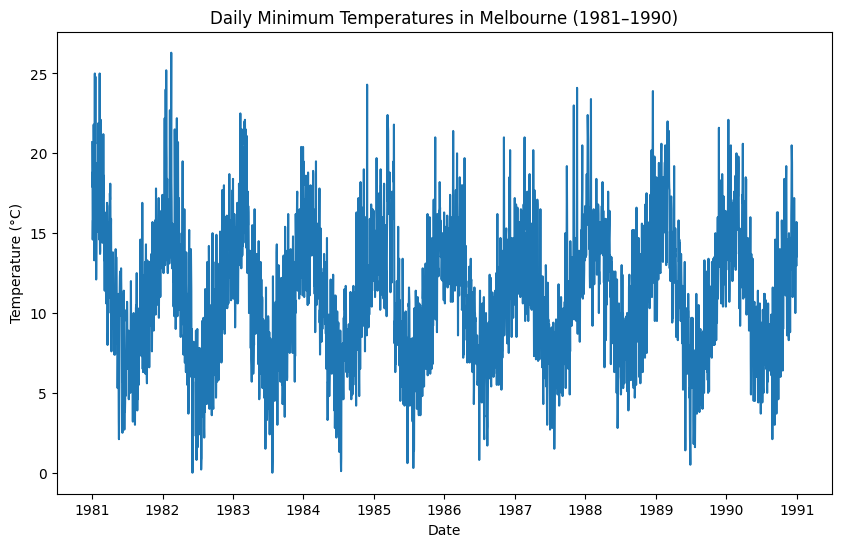

In [3]:
# Plot the raw temperature data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Daily Minimum Temperatures in Melbourne (1981–1990)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [4]:
# Split the data: 80% for training, 20% for testing
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
print(f"Training size: {len(train)}, Testing size: {len(test)}")

Training size: 2920, Testing size: 730


In [5]:
# Fit an ARIMA(1,1,1) model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 2920
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6786.315
Date:                Wed, 07 May 2025   AIC                          13578.630
Time:                        04:59:57   BIC                          13596.567
Sample:                             0   HQIC                         13585.091
                               - 2920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4579      0.019     23.604      0.000       0.420       0.496
ma.L1         -0.9216      0.009   -101.453      0.000      -0.939      -0.904
sigma2         6.1197      0.150     40.839      0.0

In [6]:
# Forecast the same number of steps as the test set
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Align forecast index with test index
forecast.index = test.index


c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
# Compute error metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse_val = rmse(test, forecast)

# Display evaluation results
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val[0]:.3f}")


Mean Absolute Error (MAE): 4.316
Mean Squared Error (MSE): 27.767
Root Mean Squared Error (RMSE): 5.082


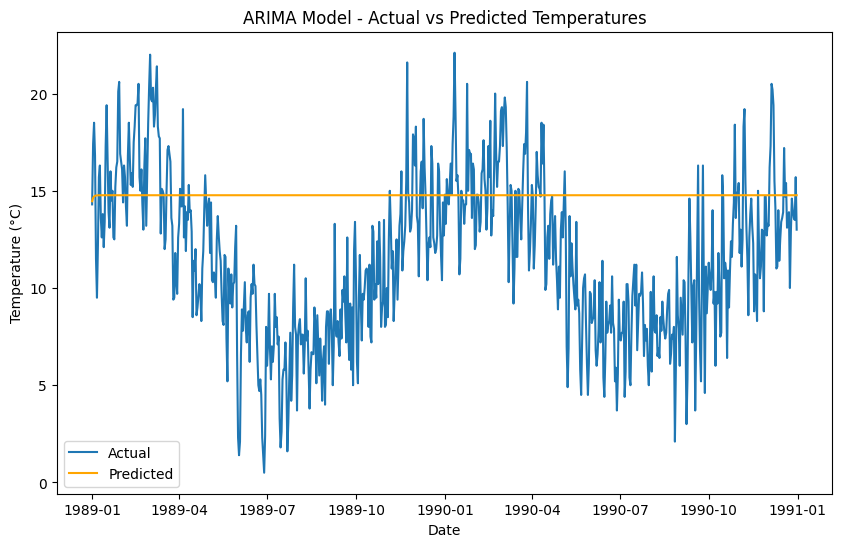

In [9]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Predicted', color='orange')
plt.title('ARIMA Model - Actual vs Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [10]:
# Forecast the next 30 days
future_steps = 30
future_forecast = model_fit.forecast(steps=future_steps)

# Create future date index
future_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')


c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Adhithya J\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


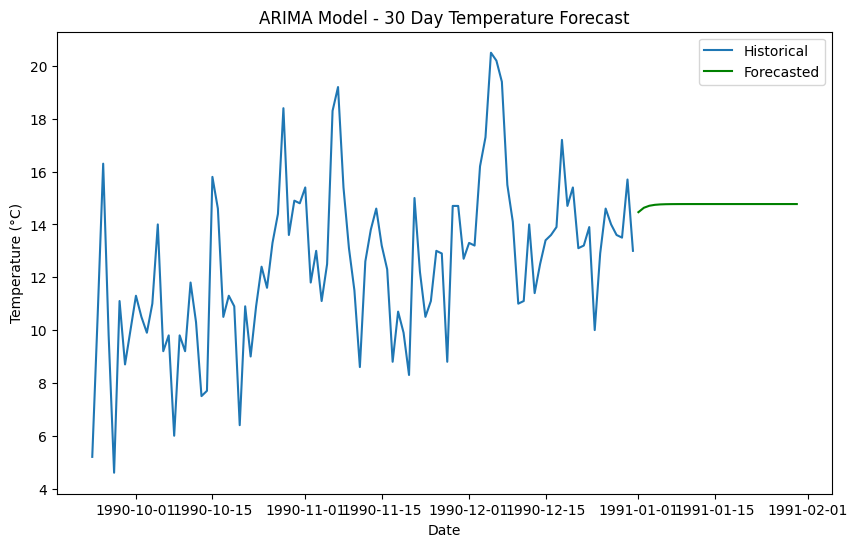

In [11]:
# Plot the forecasted future values
plt.figure(figsize=(10, 6))
plt.plot(data.index[-100:], data.iloc[-100:], label='Historical')
plt.plot(future_index, future_forecast, label='Forecasted', color='green')
plt.title('ARIMA Model - 30 Day Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
